In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [3]:
train = train_data.copy(deep=True)
test = test_data.copy(deep=True)

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##### Removing unnecessary data columns (Name, passengerid (we can use index number), ticket type)

In [6]:
train_data.drop(["Ticket", "Name", "PassengerId"], axis = "columns", inplace=True)
test_data.drop(["Ticket", "Name", "PassengerId"], axis = "columns", inplace=True)

In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
is_na_rows_age = train_data[train_data["Age"].isna()]
is_na_rows_age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,8.4583,NaN,Q
17,1,2,male,NaN,0,0,13.0000,NaN,S
19,1,3,female,NaN,0,0,7.2250,NaN,C
26,0,3,male,NaN,0,0,7.2250,NaN,C
28,1,3,female,NaN,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,NaN,C
863,0,3,female,NaN,8,2,69.5500,NaN,S
868,0,3,male,NaN,0,0,9.5000,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S


In [11]:
is_na_rows_cabinet = train_data[train_data["Cabin"].isna()]
is_na_rows_cabinet

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [12]:
test_data.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

##### Removed Cabin as it has alphanumeric data and will not help us in any kind of classification

In [13]:
train_data.drop("Cabin", axis="columns", inplace = True)
test_data.drop("Cabin", axis="columns", inplace = True)

In [14]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
train_data["Embarked"].isna().sum()

2

In [16]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

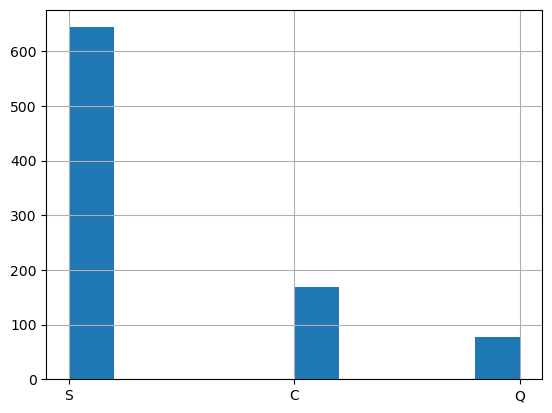

In [17]:
train_data["Embarked"].hist()

In [18]:
test_data["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<Axes: >

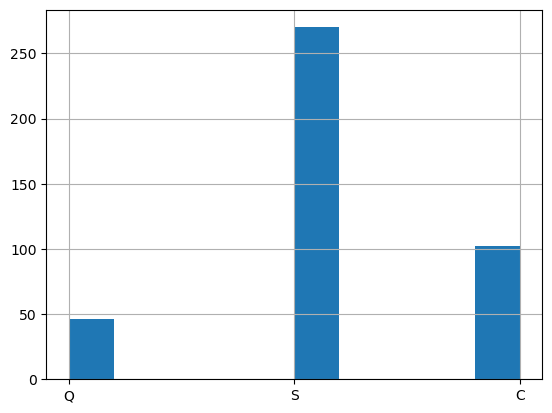

In [19]:
test_data["Embarked"].hist()

#### Fill the empty values of "Embarked" column with the least attibute frequency. here, we fill the NA "Embarked" with Q.

In [20]:
train_data["Embarked"].fillna("Q", inplace = True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
test_data["Embarked"].fillna("Q", inplace = True)

In [22]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace= True)

test_data["Fare"].isna().sum()

1

In [23]:
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace = True)

In [24]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

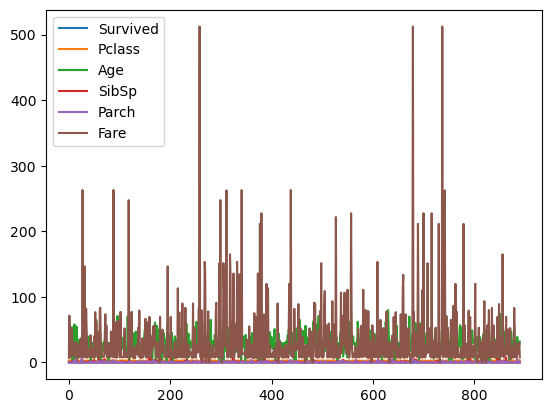

In [26]:
train_data.plot.line()

<Axes: xlabel='Survived', ylabel='Fare'>

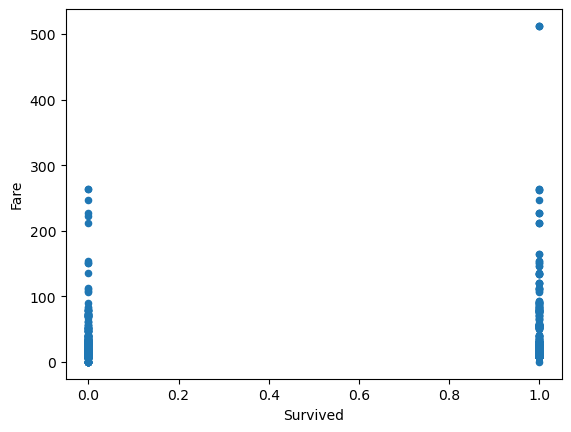

In [27]:
train_data.plot.scatter(x = 'Survived', y='Fare')

<Axes: xlabel='Survived', ylabel='Pclass'>

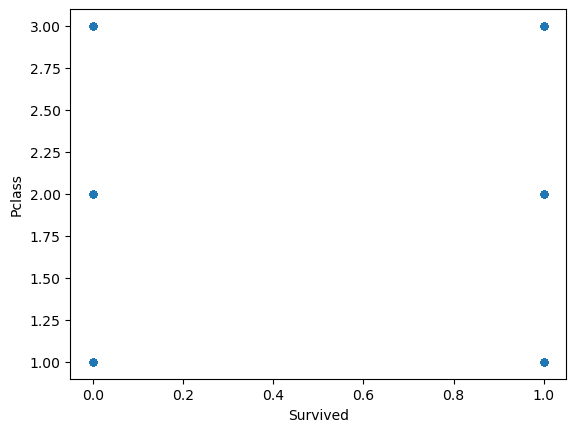

In [28]:
train_data.plot.scatter(x = 'Survived', y = 'Pclass')

<Axes: xlabel='Survived', ylabel='Sex'>

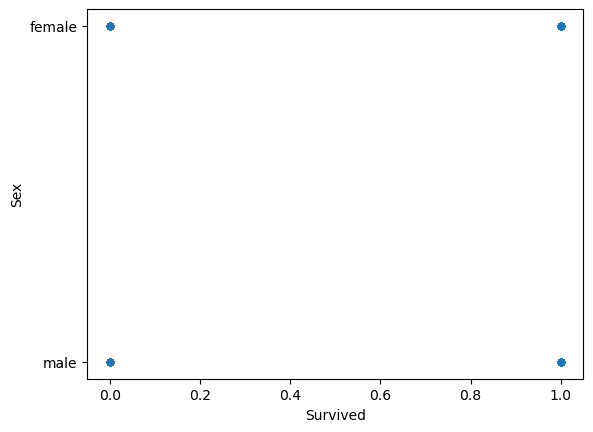

In [29]:
train_data.plot.scatter(x = 'Survived', y = 'Sex')


0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Survival Rate')

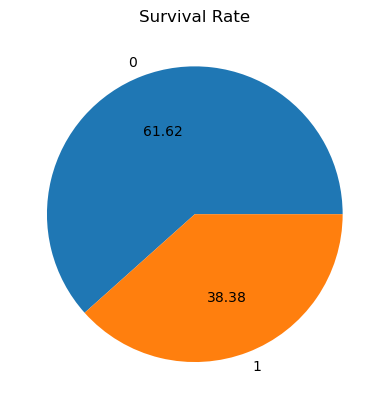

In [30]:
data = train_data["Survived"].value_counts()
print(data)
plt.pie(data, labels=data.index, autopct='%1.2f')
plt.title('Survival Rate')

male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender Distribution')

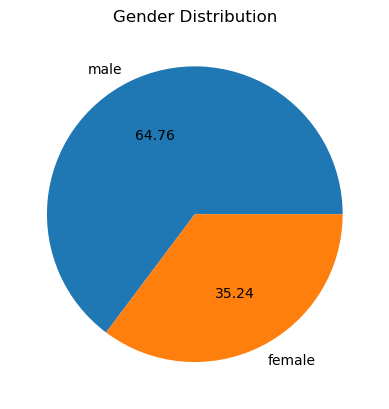

In [31]:
data = train_data["Sex"].value_counts()
print(data)
plt.pie(data, labels=data.index, autopct='%1.2f')
plt.title('Gender Distribution')

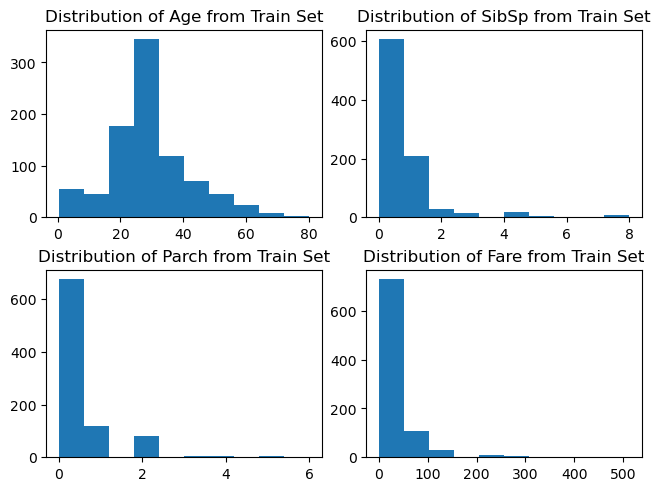

In [34]:
to_histo = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, constrained_layout = True)

for var, ax in zip(to_histo, axes.ravel()):
    ax.hist(train_data[var])
    ax.set_title(f'Distribution of {var} from Train Set')

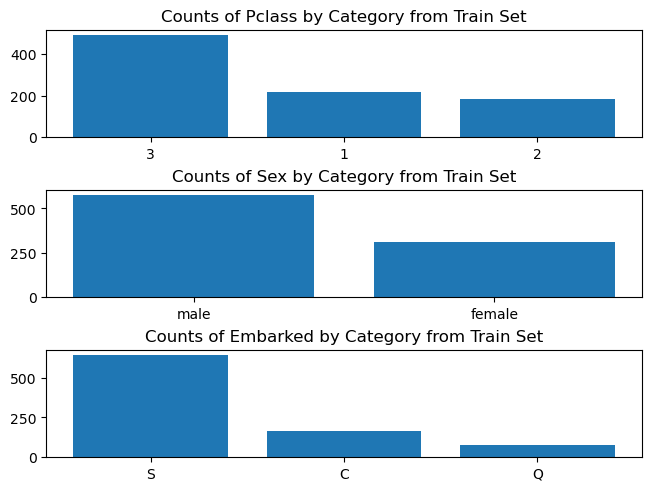

In [35]:
to_bar = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(3, 1, constrained_layout = True)

for var, ax in zip(to_bar, axes.ravel()):
    data = train_data[var].value_counts()
    ax.bar(data.index.astype(str), data)
    ax.set_title(f'Counts of {var} by Category from Train Set')

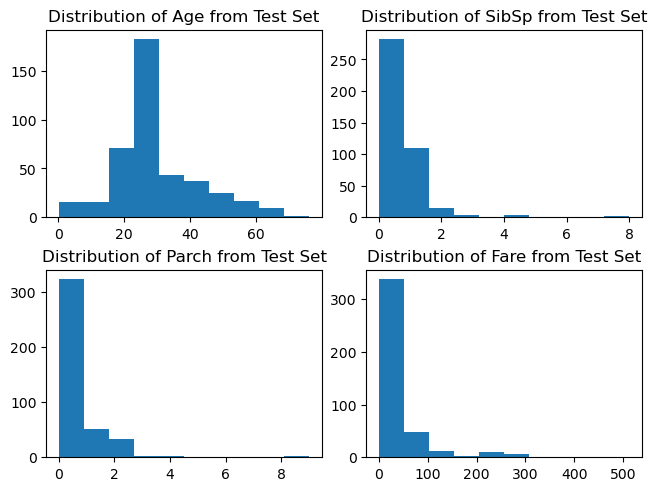

In [36]:
to_histo = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, constrained_layout = True)

for var, ax in zip(to_histo, axes.ravel()):
    ax.hist(test_data[var])
    ax.set_title(f'Distribution of {var} from Test Set')

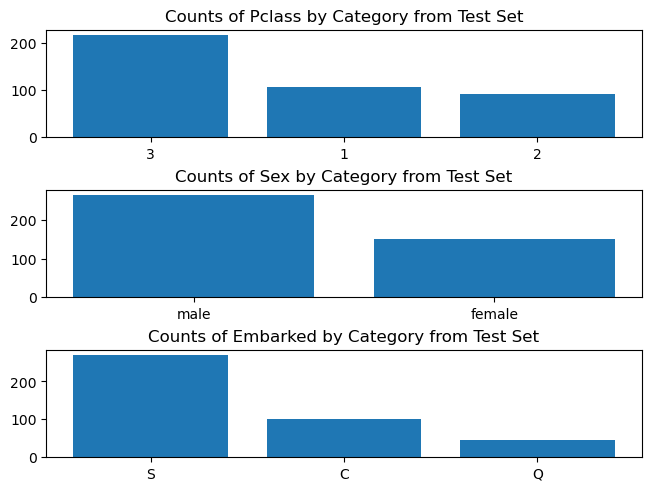

In [37]:
to_bar = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(3, 1, constrained_layout = True)

for var, ax in zip(to_bar, axes.ravel()):
    data = test_data[var].value_counts()
    ax.bar(data.index.astype(str), data)
    ax.set_title(f'Counts of {var} by Category from Test Set')

In [38]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [39]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [40]:
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Pclass', 'Embarked']).astype(int)
train_data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [41]:
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Pclass', 'Embarked']).astype(int)
test_data.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
train_data

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0,1,0,0
2,1,26,0,0,7,1,0,0,0,1,0,0,1
3,1,35,1,0,53,1,0,1,0,0,0,0,1
4,0,35,0,0,8,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13,0,1,0,1,0,0,0,1
887,1,19,0,0,30,1,0,1,0,0,0,0,1
888,0,29,1,2,23,1,0,0,0,1,0,0,1
889,1,26,0,0,30,0,1,1,0,0,1,0,0


In [43]:
test_data

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34,0,0,7,0,1,0,0,1,0,1,0
1,47,1,0,7,1,0,0,0,1,0,0,1
2,62,0,0,9,0,1,0,1,0,0,1,0
3,27,0,0,8,0,1,0,0,1,0,0,1
4,22,1,1,12,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30,0,0,8,0,1,0,0,1,0,0,1
414,39,0,0,108,1,0,1,0,0,1,0,0
415,38,0,0,7,0,1,0,0,1,0,0,1
416,30,0,0,8,0,1,0,0,1,0,0,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_data['Age'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))
train_data['Fare'] = scaler.fit_transform(train_data['Fare'].values.reshape(-1,1))

train_data

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0.2750,1,0,0.013672,0,1,0,0,1,0,0,1
1,1,0.4750,1,0,0.138672,1,0,1,0,0,1,0,0
2,1,0.3250,0,0,0.013672,1,0,0,0,1,0,0,1
3,1,0.4375,1,0,0.103516,1,0,1,0,0,0,0,1
4,0,0.4375,0,0,0.015625,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.3375,0,0,0.025391,0,1,0,1,0,0,0,1
887,1,0.2375,0,0,0.058594,1,0,1,0,0,0,0,1
888,0,0.3625,1,2,0.044922,1,0,0,0,1,0,0,1
889,1,0.3250,0,0,0.058594,0,1,1,0,0,1,0,0


In [45]:
test_data['Age'] = scaler.fit_transform(test_data['Age'].values.reshape(-1, 1))
test_data['Fare'] = scaler.fit_transform(test_data['Fare'].values.reshape(-1, 1))

test_data

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.447368,0,0,0.013672,0,1,0,0,1,0,1,0
1,0.618421,1,0,0.013672,1,0,0,0,1,0,0,1
2,0.815789,0,0,0.017578,0,1,0,1,0,0,1,0
3,0.355263,0,0,0.015625,0,1,0,0,1,0,0,1
4,0.289474,1,1,0.023438,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.394737,0,0,0.015625,0,1,0,0,1,0,0,1
414,0.513158,0,0,0.210938,1,0,1,0,0,1,0,0
415,0.500000,0,0,0.013672,0,1,0,0,1,0,0,1
416,0.394737,0,0,0.015625,0,1,0,0,1,0,0,1


In [46]:
corr = train_data.corr()

In [47]:
corr

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.067809,-0.035322,0.081629,0.257482,0.543351,-0.543351,0.285904,0.093349,-0.322308,0.168240,0.013613,-0.155660
Age,-0.067809,1.000000,-0.232743,-0.176744,0.094069,-0.082533,0.082533,0.321850,0.010199,-0.285608,0.030786,-0.008500,-0.021504
SibSp,-0.035322,-0.232743,1.000000,0.414838,0.159506,0.114631,-0.114631,-0.054582,-0.055932,0.092548,-0.059528,-0.029797,0.070941
Parch,0.081629,-0.176744,0.414838,1.000000,0.216252,0.245489,-0.245489,-0.017633,-0.000734,0.015790,-0.011069,-0.084032,0.063036
Fare,0.257482,0.094069,0.159506,0.216252,1.000000,0.182331,-0.182331,0.591693,-0.116346,-0.415117,0.269165,-0.109292,-0.165803
Sex_female,0.543351,-0.082533,0.114631,0.245489,0.182331,1.000000,-1.000000,0.098013,0.064746,-0.137143,0.082853,0.083965,-0.125722
Sex_male,-0.543351,0.082533,-0.114631,-0.245489,-0.182331,-1.000000,1.000000,-0.098013,-0.064746,0.137143,-0.082853,-0.083965,0.125722
Pclass_1,0.285904,0.321850,-0.054582,-0.017633,0.591693,0.098013,-0.098013,1.000000,-0.288585,-0.626738,0.296423,-0.139593,-0.170379
Pclass_2,0.093349,0.010199,-0.055932,-0.000734,-0.116346,0.064746,-0.064746,-0.288585,1.000000,-0.565210,-0.125416,-0.129863,0.192061
Pclass_3,-0.322308,-0.285608,0.092548,0.015790,-0.415117,-0.137143,0.137143,-0.626738,-0.565210,1.000000,-0.153329,0.225964,-0.009511


In [48]:
X = train_data[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q','Embarked_S']]
y = train_data['Survived']

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [50]:
test_data['Age'] = scaler.fit_transform(test_data['Age'].values.reshape(-1, 1))
test_data['Fare'] = scaler.fit_transform(test_data['Fare'].values.reshape(-1,1))

test_data

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.447368,0,0,0.013672,0,1,0,0,1,0,1,0
1,0.618421,1,0,0.013672,1,0,0,0,1,0,0,1
2,0.815789,0,0,0.017578,0,1,0,1,0,0,1,0
3,0.355263,0,0,0.015625,0,1,0,0,1,0,0,1
4,0.289474,1,1,0.023438,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.394737,0,0,0.015625,0,1,0,0,1,0,0,1
414,0.513158,0,0,0.210938,1,0,1,0,0,1,0,0
415,0.500000,0,0,0.013672,0,1,0,0,1,0,0,1
416,0.394737,0,0,0.015625,0,1,0,0,1,0,0,1


In [51]:
pred = model.predict(test_data)

pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
test_data_with_survived = pd.DataFrame({'PassengerID': test['PassengerId'], 'Pclass': test['Pclass'], 'Name': test['Name'], 'Sex': test['Sex'], 'Age': test['Age'], 'SibSp': test['SibSp'], 'Parch': test['Parch'], 'Ticket': test['Ticket'], 'Fare': test['Fare'], 'Cabin': test['Cabin'], 'Embarked': test['Embarked'], 'Survived_Prediction': pred})
test_data_with_survived

,PassengerID,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
